**Общая информация**

**Срок сдачи:** 13 марта 2017, 06:00 <br\>
**Штраф за опоздание:** -2 балла после 06:00 13 марта, -4 балла после 06:00 20 марта, -6 баллов после 06:00 27 марта

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush

Необходимо в slack создать таск в приватный чат:
/todo Фамилия Имя ссылка на гитхаб @alkhamush
Пример:
/todo Ксения Стройкова https://github.com/stroykova/spheremailru/stroykova_hw1.ipynb @alkhamush

Используйте данный Ipython Notebook при оформлении домашнего задания.

###### Задание 1 (2 баллов)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. Самостоятельно разберитесь, как считается score из KNeighborsClassifier и реализуйте аналог в своём классе.

###### Задание 2 (2 балла)
Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn 4 балла для iris и mnist
Для этого используем numpy

###### Задание 3 (2 балла)
Для iris найдите такой параметр n_neighbors, при котором выдаётся наилучший score. Нарисуйте график зависимости score от n_neighbors

###### Задание 3 (2 балла)
Выполнить требования pep8

###### Задание 5 (2 балла)
Описать для чего нужны следующие библиотеки/классы/функции (список будет ниже)


In [3]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import datasets
from sklearn.base import ClassifierMixin
from sklearn.datasets import fetch_mldata
from sklearn.neighbors.base import NeighborsBase, KNeighborsMixin, SupervisedIntegerMixin 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
%load_ext pycodestyle_magic

In [4]:
%%pycodestyle


class MyKNeighborsClassifier(NeighborsBase,
                             KNeighborsMixin,
                             SupervisedIntegerMixin,
                             ClassifierMixin):

    def __init__(self, n_neighbors):
        self.neighbors_param = n_neighbors

    def fit(self, X, y):
        self.fit_X = X.copy()
        self.fit_y = y.copy()
        self.fit_classes = []
        for t in y:
            if t not in self.fit_classes:
                self.fit_classes.append(t)

    def predict(self, X):
        y = np.zeros(X.shape[0])
        fit_X_tmp = np.tile(self.fit_X, (X.shape[0], 1))
        X_tmp = np.tile(X, (1, self.fit_X.shape[0]))
        X_tmp = X_tmp.reshape((self.fit_X.shape[0]*X.shape[0], X.shape[1]))
        tmp = (((fit_X_tmp - X_tmp) ** 2).sum(axis=1)) ** 0.5
        tmp = tmp.reshape((X.shape[0], self.fit_X.shape[0]))
        tmp = np.argsort(tmp, axis=1)
        tmp = tmp[:, 0:self.neighbors_param].copy()
        rows_mask = np.arange(tmp.shape[0]).reshape(tmp.shape[0], 1)
        rows_mask = np.tile(rows_mask, (1, self.neighbors_param))
        cols_mask = tmp
        fit_y_tmp = self.fit_y.reshape((1, self.fit_y.shape[0]))
        fit_y_tmp = np.tile(fit_y_tmp, (tmp.shape[0], 1))
        tttmp = np.zeros((tmp.shape[0], len(self.fit_classes)))
        for i, t in enumerate(self.fit_classes):
            ttttmp = np.zeros((fit_y_tmp.shape[0], fit_y_tmp.shape[1]))
            ttttmp[fit_y_tmp == t] = 1
            tttmp[:, i] = ttttmp[rows_mask, cols_mask].sum(axis=1)
        tttmp = np.argsort(tttmp, axis=1)
        y = tttmp[:, -1].copy()
        tmp_classes = np.array(self.fit_classes)
        y = tmp_classes[y].copy()
        return y

    def predict_proba(self, X):
        y = np.zeros(X.shape[0])
        fit_X_tmp = np.tile(self.fit_X, (X.shape[0], 1))
        X_tmp = np.tile(X, (1, self.fit_X.shape[0]))
        X_tmp = X_tmp.reshape((self.fit_X.shape[0]*X.shape[0], X.shape[1]))
        tmp = (((fit_X_tmp - X_tmp) ** 2).sum(axis=1)) ** 0.5
        tmp = tmp.reshape((X.shape[0], self.fit_X.shape[0]))
        tmp = np.argsort(tmp, axis=1)
        tmp = tmp[:, 0:self.neighbors_param].copy()
        rows_mask = np.arange(tmp.shape[0]).reshape(tmp.shape[0], 1)
        rows_mask = np.tile(rows_mask, (1, self.neighbors_param))
        cols_mask = tmp
        fit_y_tmp = self.fit_y.reshape((1, self.fit_y.shape[0]))
        fit_y_tmp = np.tile(fit_y_tmp, (tmp.shape[0], 1))
        tttmp = np.zeros((tmp.shape[0], len(self.fit_classes)))
        for i, t in enumerate(self.fit_classes):
            ttttmp = np.zeros((fit_y_tmp.shape[0], fit_y_tmp.shape[1]))
            ttttmp[fit_y_tmp == t] = 1
            tttmp[:, i] = ttttmp[rows_mask, cols_mask].sum(axis=1)
        tmp_sums = tttmp.sum(axis=1).reshape(tttmp.shape[0], 1)
        tmp_sums = np.tile(tmp_sums, (1, tttmp.shape[1]))
        tttmp = tttmp / tmp_sums

        rows_mask = np.arange(tttmp.shape[0]).reshape(tttmp.shape[0], 1)
        rows_mask = np.tile(rows_mask, (1, len(self.fit_classes)))
        cols_mask = np.arange(len(self.fit_classes))
        cols_mask = np.array(cols_mask)[np.argsort(np.array(self.fit_classes))]
        cols_mask = np.tile(cols_mask, (tttmp.shape[0], 1))
        y = tttmp[rows_mask, cols_mask].copy()
        return y

    def score(self, X, y):
        predicted = self.predict(X)
        cnt = 0.
        for i, t in enumerate(y):
            if predicted[i] == t:
                cnt = cnt + 1.
        return cnt/len(y)


**IRIS**

In [39]:
iris = datasets.load_iris()

In [40]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [41]:
clf = KNeighborsClassifier(n_neighbors=2)
my_clf = MyKNeighborsClassifier(n_neighbors=2)

In [42]:
%time clf.fit(X_train, y_train)

CPU times: user 4.26 ms, sys: 41 µs, total: 4.3 ms
Wall time: 3.21 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [43]:
%time my_clf.fit(X_train, y_train)

CPU times: user 3.37 ms, sys: 0 ns, total: 3.37 ms
Wall time: 2.01 ms


In [44]:
%time clf.predict(X_test)

CPU times: user 4.8 ms, sys: 245 µs, total: 5.05 ms
Wall time: 3.91 ms


array([1, 0, 1, 1, 1, 2, 2, 0, 1, 2, 1, 0, 2, 0, 0])

In [45]:
%time my_clf.predict(X_test)

CPU times: user 5.31 ms, sys: 66 µs, total: 5.38 ms
Wall time: 3.41 ms


array([1, 0, 1, 1, 1, 2, 2, 0, 1, 2, 1, 0, 2, 0, 0])

In [46]:
%time clf.predict_proba(X_test)

CPU times: user 4.58 ms, sys: 156 µs, total: 4.74 ms
Wall time: 3.44 ms


array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [47]:
%time my_clf.predict_proba(X_test)

CPU times: user 5.45 ms, sys: 463 µs, total: 5.91 ms
Wall time: 5.78 ms


array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [48]:
clf.score(X_test, y_test)

0.9333333333333333

In [49]:
my_clf.score(X_test, y_test)

0.9333333333333333

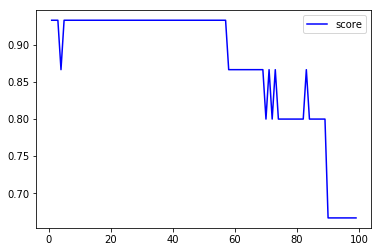

In [51]:
# Задание 3
neighbors = range(1, 100)
accur = []
for i in neighbors:
    my_clf = MyKNeighborsClassifier(n_neighbors=i)
    my_clf.fit(X_train, y_train)
    accur.append(my_clf.score(X_test, y_test))

plt.plot(neighbors, accur, color="blue", label="score")
plt.legend()
#required n_neighbors = 2

**MNIST**

In [159]:
mnist = fetch_mldata('MNIST original')

HTTPError: HTTP Error 500: Internal Server Error

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.1, stratify=mnist.target)

In [ ]:
clf = KNeighborsClassifier(n_neighbors=2)
my_clf = MyKNeighborsClassifier(n_neighbors=2)

In [ ]:
%time clf.fit(X_train, y_train)

In [ ]:
%time my_clf.fit(X_train, y_train)

In [ ]:
%time clf.predict(X_test)

In [ ]:
%time my_clf.predict(X_test)

In [ ]:
%time clf.predict_proba(X_test)

In [ ]:
%time my_clf.predict_proba(X_test)

In [ ]:
clf.score(X_test, y_test)

In [ ]:
my_clf.score(X_test, y_test)

Задание 5

In [1]:
# seaborn визуализация статистических данных
# matplotlib построение графиков
# train_test_split разбиение выборки на тестовую и обучающую
# Pipelin%load_ext e (from sklearn.pipeline import Pipeline) ? (выполнение операций в определенной последовательности)
# StandardScaler (from sklearn.preprocessing import StandardScaler) приводит выборку к нулевому матожиданию и единичной дисперсии
# ClassifierMixin базовый класс классификаторов в sklearn
# NeighborsBase базовый класс метода ближайших соседей
# KNeighborsMixin загружает обучающую выборку для метода k-ближайших соседей
# SupervisedIntegerMixin загружает обучающую выборку 